In [1]:
import tensorflow as tf

from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1612453572616550872, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1461639577
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6485272233728968550
 physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"]

### 1. 이미지 데이터 시각화

In [2]:
# display some images for every different expression

import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
%matplotlib inline
# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "../images/realtime/input/"

Using TensorFlow backend.


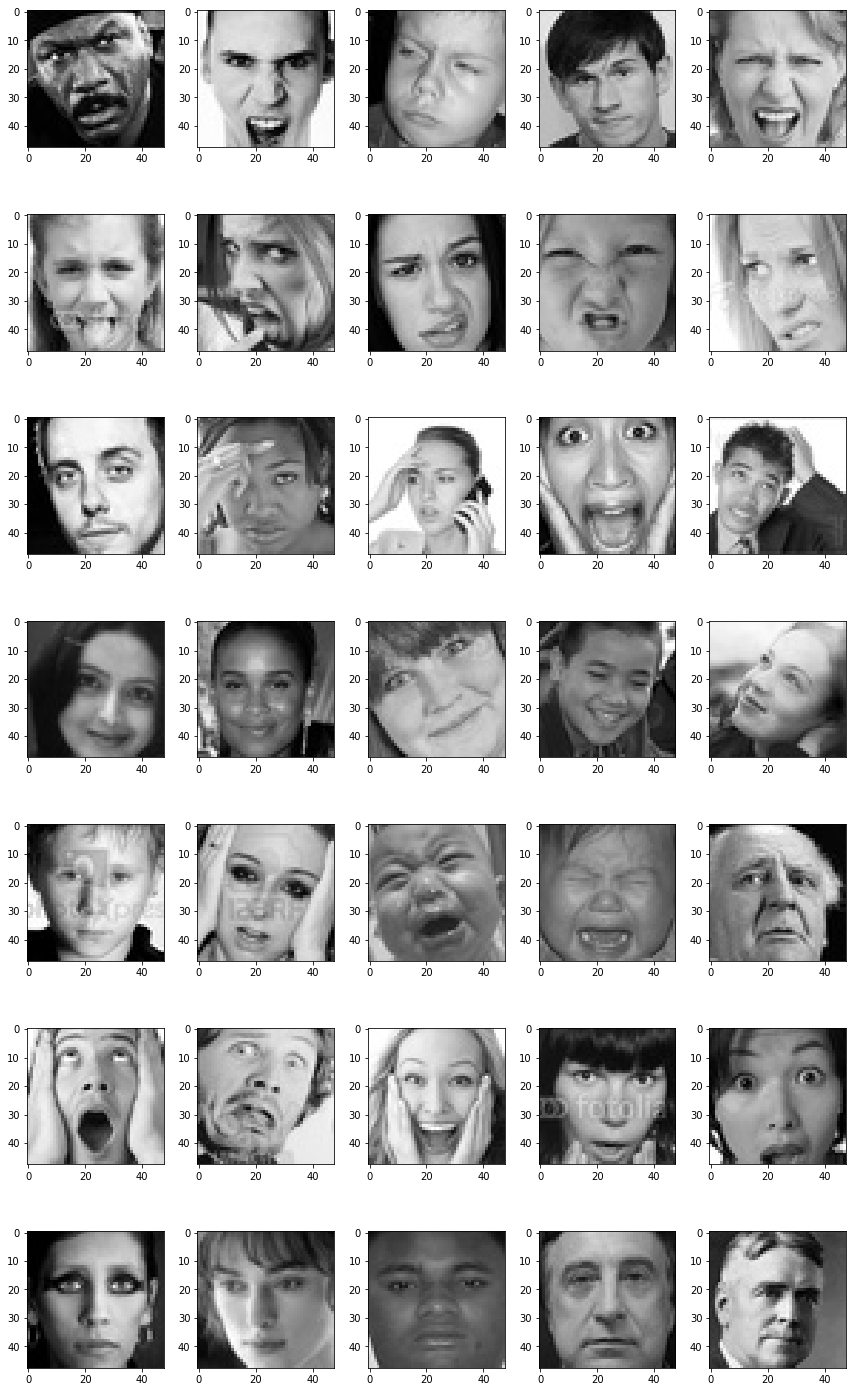

In [3]:
# display some images for every different expression

import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
%matplotlib inline
# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "../images/realtime/input/"

plt.figure(0, figsize=(12,20))
cpt = 0
trainFolder = "training/"
for expression in os.listdir(base_path + trainFolder):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + trainFolder + expression + "/" +os.listdir(base_path + trainFolder + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

### 2. 이미지 데이터 불러오기 및 형태 확인

In [4]:
import numpy as np
from numpy import array
import os
import cv2

In [5]:
TRAIN_DIR = '../images/realtime/input/Training/'
train_folder_list = array(os.listdir(TRAIN_DIR))
train_folder_list

IMG_SIZE = 48
train_images=[]
train_labels=[]
for index in range(0, len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            train_images.append(new_img)
            train_labels.append(index)
        except:
            pass

In [6]:
train_data = array(train_images)
train_labels = array(train_labels)

array(train_data).shape

w, h = 48, 48
x_train = train_data.reshape(train_data.shape[0], w, h,1 )

from keras.utils import to_categorical

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)

 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[100000])

y_train = train_labels_one_hot

modelDim = x_train[0].shape
modelDim

Original label 0 :  6


(48, 48, 1)

### 3. 모델 선언

In [7]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

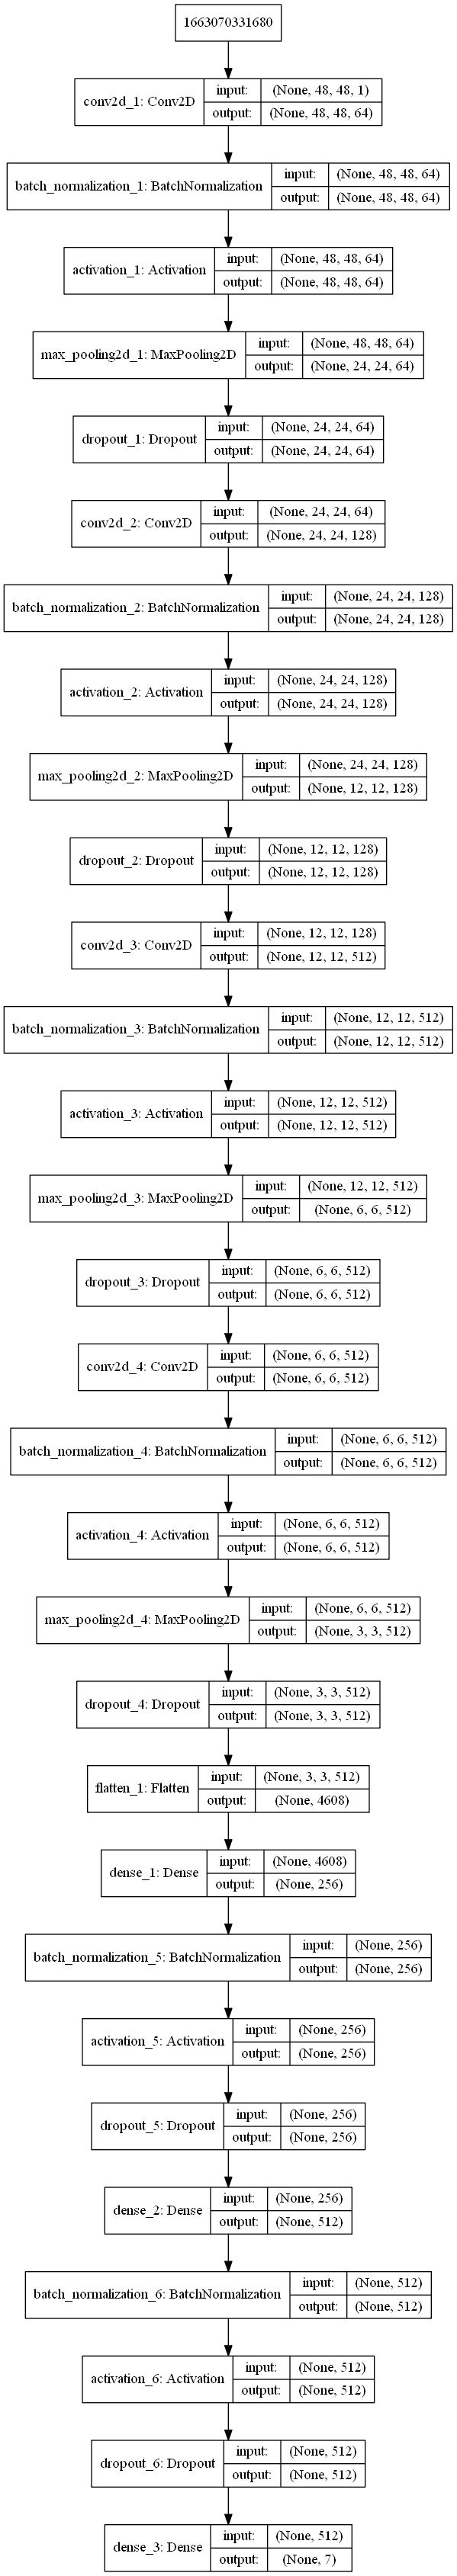

In [8]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)
from IPython.display import Image
Image(retina=True, filename='model_plot.png')

## 4. Train Model [재학습]

In [9]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='1'

In [10]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

In [11]:
from keras.models import model_from_json 
json_file = open("model3.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 
loaded_model = model_from_json(loaded_model_json)

In [20]:
loaded_model.load_weights("model_weights2.h5") 
print("Loaded model from disk")

Loaded model from disk


In [21]:
loaded_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
import keras

In [23]:
save_dir="./ddd/"

In [24]:
# number of epochs to train the NN
epochs = 10

from keras.callbacks import ModelCheckpoint

# checkpoint = ModelCheckpoint("model_weights_rev.h5", monitor='acc', verbose=1, save_best_only=True, mode='max')

callbacks = [
    
    keras.callbacks.TensorBoard(
    log_dir = save_dir,
    write_graph=True,
    write_images=True),
    
#     keras.callbacks.EarlyStopping(
#     monitor = 'val_acc', patience=10,
#     )
    
    ModelCheckpoint("model_weights_rev.h5", monitor='acc', verbose=1, save_best_only=True, mode='max')
]

# callbacks_list = [checkpoint]

#checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
loaded_model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=epochs,
         callbacks=callbacks
         )

Epoch 1/10
114826/114826 [==============================] - 248s 2ms/step - loss: 0.9951 - acc: 0.6255

Epoch 00001: acc improved from -inf to 0.62550, saving model to model_weights_rev.h5
Epoch 2/10
114826/114826 [==============================] - 257s 2ms/step - loss: 0.8013 - acc: 0.7031

Epoch 00002: acc improved from 0.62550 to 0.70306, saving model to model_weights_rev.h5
Epoch 3/10
114826/114826 [==============================] - 257s 2ms/step - loss: 0.6149 - acc: 0.7751

Epoch 00003: acc improved from 0.70306 to 0.77509, saving model to model_weights_rev.h5
Epoch 4/10
114826/114826 [==============================] - 257s 2ms/step - loss: 0.4620 - acc: 0.8322

Epoch 00004: acc improved from 0.77509 to 0.83216, saving model to model_weights_rev.h5
Epoch 5/10
114826/114826 [==============================] - 258s 2ms/step - loss: 0.3554 - acc: 0.8715

Epoch 00005: acc improved from 0.83216 to 0.87151, saving model to model_weights_rev.h5
Epoch 6/10
114826/114826 [=================

## 4.Train Model [기본]

In [16]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='1'

In [21]:
# # number of epochs to train the NN
# epochs = 3

# from keras.callbacks import ModelCheckpoint

# checkpoint = ModelCheckpoint("model_weights.h5", monitor='acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

# #checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
# model.fit(x_train,
#          y_train,
#          batch_size=64,
#          epochs=epochs,
#          callbacks=callbacks_list
#          )

### 5. 모델 저장

In [10]:
# serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save("realtimemodel_all.h5")

model.save_weights("realtimemodel_weight.h5")

### 6. 모델 재사용

In [77]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

In [78]:
from keras.models import model_from_json 
json_file = open("model.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 
loaded_model = model_from_json(loaded_model_json)

In [79]:
loaded_model.load_weights("model_weights2.h5") 
print("Loaded model from disk")

Loaded model from disk


In [80]:
# opt = Adam(lr=0.0001)
loaded_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
# number of epochs to train the NN
epochs = 3

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights3.h5", monitor='acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
loaded_model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=epochs,
         callbacks=callbacks_list
         )

Epoch 1/3
114826/114826 [==============================] - 5614s 49ms/step - loss: 1.0026 - acc: 0.6222

Epoch 00001: acc improved from -inf to 0.62221, saving model to model_weights3.h5
Epoch 2/3
114826/114826 [==============================] - 5488s 48ms/step - loss: 0.8146 - acc: 0.6972

Epoch 00002: acc improved from 0.62221 to 0.69720, saving model to model_weights3.h5
Epoch 3/3
114826/114826 [==============================] - 5573s 49ms/step - loss: 0.6452 - acc: 0.7623

Epoch 00003: acc improved from 0.69720 to 0.76234, saving model to model_weights3.h5


모델 저장

In [87]:
# serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save("realtimemodel_all.h5")

model.save_weights("realtimemodel_weight.h5")

### 예측

In [60]:
import cv2

testimg = cv2.imread(\
     "../images/facedetec2t_webcam.png", cv2.IMREAD_GRAYSCALE)

testimg.shape

testimg2 = testimg.reshape(1,48,48,1)

testprd = loaded_model.predict(testimg2)

EMOTIONS_LIST = ["Angry", "Disgust",
                 "Fear", "Happy",
                 "Neutral", "Sad",
                 "Surprise"]

import numpy as np

EMOTIONS_LIST[np.argmax(testprd)]

'Neutral'